In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# setting no limit for the max columns to display, for easier investigation 
pd.options.display.max_columns = None

df = pd.read_csv('Complete_Dataset_updated.csv')
df.head()

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index
0,7/6/2022,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516
1,7/6/2022,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,44744,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516
2,7/6/2022,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646
3,7/6/2022,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,44744,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646
4,7/6/2022,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,44744,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

# the dates are in Excel date format, so we need to turn into datetime objects
df['Satellite_Images_Dates'] = pd.to_datetime(df['Satellite_Images_Dates'], origin='1899-12-30', unit='D')

df['Satellite_Images_Dates'] = df['Satellite_Images_Dates'].dt.strftime('%Y-%m-%d')
df[['Date', 'Satellite_Images_Dates']]

,Date,Satellite_Images_Dates
0,2022-07-06,2022-07-02
1,2022-07-06,2022-07-02
2,2022-07-06,2022-07-02
3,2022-07-06,2022-07-02
4,2022-07-06,2022-07-02
...,...,...
307,2023-03-01,2023-02-27
308,2023-03-01,2023-02-27
309,2023-03-01,2023-02-27
310,2023-03-01,2023-02-27


#### Handling Datetimes into day, month, year columns

In [22]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# columns for the date of the satellite images
df['sat_day'] = df['Satellite_Images_Dates'].str.split('-').str[2].astype(int)
df['sat_month'] = df['Satellite_Images_Dates'].str.split('-').str[1].astype(int)
df['sat_year'] = df['Satellite_Images_Dates'].str.split('-').str[0].astype(int)

df

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Sample_type,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year
0,2022-07-06,187,1,1,-20.446717,-54.839505,Q1,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022
1,2022-07-06,187,1,2,-20.446717,-54.839505,Q1,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022
2,2022-07-06,187,2,1,-20.446996,-54.838856,Q4,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022
3,2022-07-06,187,2,2,-20.446996,-54.838856,Q4,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022
4,2022-07-06,187,3,1,-20.446424,-54.839246,G2,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,Q4,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023
308,2023-03-01,60,155,1,-20.446937,-54.839311,S1,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,4.237497,1,3,2023,27,2,2023
309,2023-03-01,60,155,2,-20.446937,-54.839311,S1,0,45.493257,8.218142,15634.666670,60.697330,45.194175,8.190470,53.693738,58.473144,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.9811

#### Performing OneHotEncoding for sample types

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

one_hot_array = encoder.fit_transform(df[['Sample_type']]).toarray()

one_hot_types_df = pd.DataFrame(one_hot_array, columns=encoder.get_feature_names_out())
# one_hot_types_df

# adding the one-hot encoded columns to the original dataframe (without the original sample type column)
df_encoded = pd.concat([df.drop('Sample_type', axis=1), one_hot_types_df], axis=1)
df_encoded

,Date,DOY,Sample,Sub-Sample,Lat,Long_,Animals,DM,MM,Biomass,NDF,ADF,CP,TDN_based_ADF,TDN_based_NDF,Satellite_Images_Dates,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12,NDVI,NDWI,EVI,LAI,DVI,GCI,GEMI,SAVI,TEMP_MAX,TEMP_MIN,RAD_SOL,Rainfall,WIND_SPD,EVAPOT,PRES_ATM,HUM_REL,TP_SFC_AVG,Wind_Dir,Dew_Point,Radiative_Dif_AVG,Radiative_Direct_AVG,PPFD,Longwave_Rad_AVG,Environmental Suitability Index,day,month,year,sat_day,sat_month,sat_year,Sample_type_G1,Sample_type_G2,Sample_type_G3,Sample_type_G4,Sample_type_Q1,Sample_type_Q2,Sample_type_Q3,Sample_type_Q4,Sample_type_S1,Sample_type_S2
0,2022-07-06,187,1,1,-20.446717,-54.839505,1,54.177195,6.869019,2943.000000,79.722130,52.504546,4.632363,47.998959,50.537899,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.209516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-07-06,187,1,2,-20.446717,-54.839505,1,54.177058,6.835684,2943.000000,70.663844,46.794328,4.811976,52.447219,54.316111,2022-07-02,1325,1456,1710,2012,2427,2952,3147,3171,3272,3280,3499,2919,0.223616,-0.033525,0.160974,0.464404,1159,0.854386,-1341990.624,0.335391,30.7,19.2,16.17,0.0,21.8,4.95,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,5.109516,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2022-07-06,187,2,1,-20.446996,-54.838856,1,52.260843,5.125652,2855.333333,79.330072,50.323829,4.644871,49.697737,50.701427,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.506646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022-07-06,187,2,2,-20.446996,-54.838856,1,52.285797,5.241126,2855.333333,73.021953,49.138437,4.647189,50.621158,53.332543,2022-07-02,1358,1449,1703,2019,2435,2956,3096,3146,3303,3260,3415,2855,0.218199,-0.016672,0.156601,0.448582,1127,0.847328,-1268877.255,0.327267,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,4.606646,6,7,2022,2,7,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-07-06,187,3,1,-20.446424,-54.839246,1,49.984466,4.742429,3058.666667,74.705529,53.632386,5.006476,47.120371,52.630324,2022-07-02,1318,1422,1664,1986,2381,2861,3025,3060,3156,3194,3323,2834,0.212842,-0.025776,0.150619,0.426941,1074,0.838942,-1152285.914,0.319231,30.7,19.2,16.17,0.0,21.8,4.96,1014.941667,47.458333,23.187826,119.917171,8.584028,160.617416,7.444173,358.837504,344.212487,3.703806,6,7,2022,2,7,2022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2023-03-01,60,154,2,-20.446365,-54.838516,1,31.915926,10.798575,2261.000000,48.798779,40.637087,7.922138,57.243710,63.436029,2023-02-27,1255,1383,1713,1604,2324,3746,4047,3808,4161,4109,3017,2144,0.407243,0.159376,0.312047,1.010986,2204,1.223001,-4854961.418,0.610808,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,593.233703,400.042911,5.312839,1,3,2023,27,2,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
308,2023-03-01,60,155,1,-20.446937,-54.839311,0,45.505167,8.263333,15634.666670,59.758212,44.775544,7.958124,54.019852,58.864850,2023-02-27,1303,1328,1673,1468,2139,3779,4215,3907,4504,4169,2982,2047,0.453767,0.203313,0.349824,1.147663,2439,1.335326,-5945726.831,0.680588,31.9,22.8,22.54,2.5,12.4,4.89,1015.800000,75.291667,19.443586,124.981135,12.442361,70.217280,296.533237,59

# Predictive Analytics

In [24]:
X = df_encoded.drop(['Biomass', 'Date', 'Satellite_Images_Dates'], axis=1)
y = df_encoded['Biomass']

### Feature Selection

#### 1. First Technique (Lasso)

In [125]:
from sklearn.linear_model import LassoCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

random_states = [0, 42, 100, 101, 123, 2025]
lasso_results = {}

for state in random_states:
    # Perform cross-validation to find the best alpha
    lasso_cv = LassoCV(alphas=list(np.logspace(-4, 4, 100)), cv=5, max_iter=5000, random_state=state, n_jobs=-1) #verbose is for not printing internal output in lassocv
    lasso_cv.fit(X, y)
    
    # Store the results
    lasso_results[state] = {
        'best_alpha': lasso_cv.alpha_,
        'lasso_coef': lasso_cv.coef_
    }

# Display the results
for state, result in lasso_results.items():
    print(f"Random State: {state}, Best Alpha: {result['best_alpha']}")
    # print(f"Coefficients: {result['lasso_coef']}\n")


Random State: 0, Best Alpha: 31.257158496882415
Random State: 42, Best Alpha: 31.257158496882415
Random State: 100, Best Alpha: 31.257158496882415
Random State: 101, Best Alpha: 31.257158496882415
Random State: 123, Best Alpha: 31.257158496882415
Random State: 2025, Best Alpha: 31.257158496882415


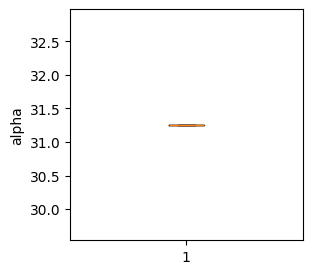

In [126]:
alpha_vals = []
for result in lasso_results.values():
    alpha_vals.append(result['best_alpha'])
plt.figure(figsize=(3,3))
plt.boxplot(alpha_vals)
plt.ylabel('alpha')
plt.show()

For multiple random states, lassoCV determined the best alpha value to be 31.257158496882415

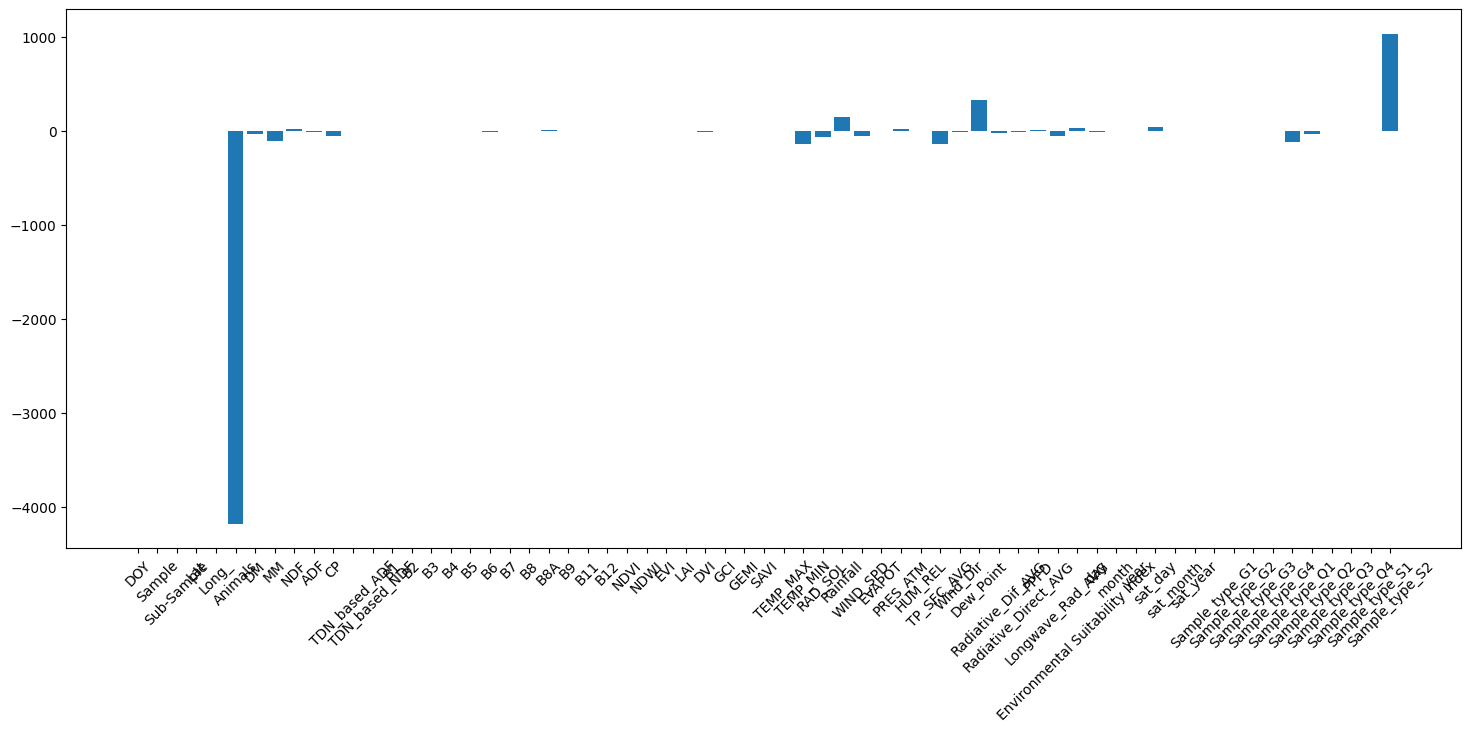

In [127]:
best_coef = lasso_results[0]['lasso_coef']
col_names = X.columns
plt.figure(figsize=(18, 7))
plt.bar(col_names, best_coef)
plt.xticks(rotation=45)
plt.show()

In [128]:
# making the plot more readable by removing the features with less than 10 coefficients
simplified_features = col_names[best_coef > 10] # 10 was chosed because observed coefficients less than 10 are not significant
simplified_lasso_coef = best_coef[best_coef > 10]
simplified_features

Index(['NDF', 'Rainfall', 'PRES_ATM', 'Dew_Point', 'PPFD',
       'Environmental Suitability Index', 'sat_day', 'Sample_type_S2'],
      dtype='object')

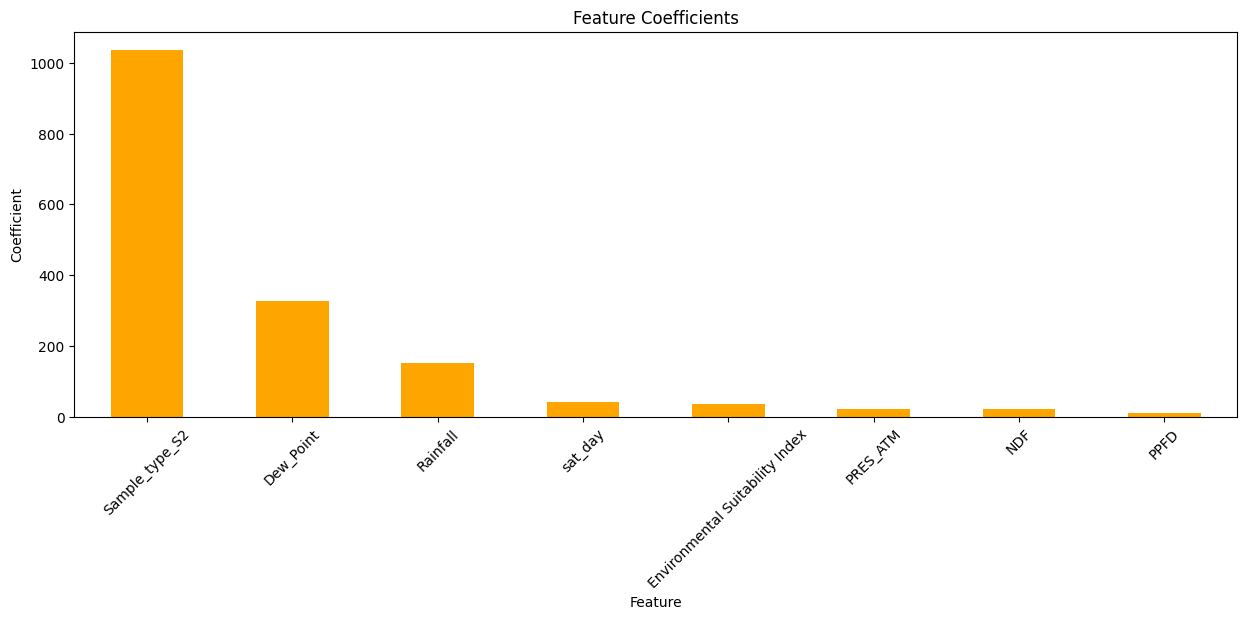

In [129]:
feature_coef_df = pd.DataFrame({'feature': simplified_features, 'coefficient': simplified_lasso_coef})

sorted_feature_coef_df = feature_coef_df.sort_values(by='coefficient', ascending=False)
sorted_feature_coef_df.plot(kind='bar', x='feature', y='coefficient', figsize=(15, 5), color='orange', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.xlabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In [130]:
lasso_selected_features = feature_coef_df['feature'].to_list()
lasso_selected_features_df = df_encoded[lasso_selected_features]
lasso_selected_features_df

,NDF,Rainfall,PRES_ATM,Dew_Point,PPFD,Environmental Suitability Index,sat_day,Sample_type_S2
0,79.722130,0.0,1014.941667,8.584028,358.837504,3.209516,2,0.0
1,70.663844,0.0,1014.941667,8.584028,358.837504,5.109516,2,0.0
2,79.330072,0.0,1014.941667,8.584028,358.837504,3.506646,2,0.0
3,73.021953,0.0,1014.941667,8.584028,358.837504,4.606646,2,0.0
4,74.705529,0.0,1014.941667,8.584028,358.837504,3.703806,2,0.0
...,...,...,...,...,...,...,...,...
307,48.798779,2.5,1015.800000,12.442361,593.233703,5.312839,27,0.0
308,59.758212,2.5,1015.800000,12.442361,593.233703,4.237497,27,0.0
309,60.697330,2.5,1015.800000,12.442361,593.233703,5.537497,27,0.0
310,76.160698,2.5,1015.800000,12.442361,593.233703,4.834511,27,1.0


In [131]:
lasso_selected_features_df['Sample_type_S2'].var()

np.float64(0.11686866188473909)

**quick note**: altough Sample_type_S2 has a very low varience, i decided to keep it to study the performance of the model when trained on this select dataset

#### 2. Second Technique (SelectFromModel)

In [132]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

sfm = SelectFromModel(model)
sfm.fit(X_train, y_train)

selected_features = X.columns[sfm.get_support()]
SFM_df = df[selected_features]
SFM_df


,Lat,Long_,NDWI,LAI,EVAPOT,month
0,-20.446717,-54.839505,-0.033525,0.464404,4.95,7
1,-20.446717,-54.839505,-0.033525,0.464404,4.95,7
2,-20.446996,-54.838856,-0.016672,0.448582,4.96,7
3,-20.446996,-54.838856,-0.016672,0.448582,4.96,7
4,-20.446424,-54.839246,-0.025776,0.426941,4.96,7
...,...,...,...,...,...,...
307,-20.446365,-54.838516,0.159376,1.010986,4.89,3
308,-20.446937,-54.839311,0.203313,1.147663,4.89,3
309,-20.446937,-54.839311,0.203313,1.147663,4.89,3
310,-20.446972,-54.839168,0.169291,1.124554,4.89,3


#### It is clear that the two feature selection techniques resulted in different selected features, this is interesting because we can test them and see which gives the best results.

### Models Comparison

### Machine Learning Regression Model (LinearRegression)

##### Training LinearRegression model on the selected features from Lasso

In [133]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def select_best_model_kfold(data, model=LinearRegression(), n_splits=5, random_state=42):
    """
    Function to perform k-fold cross-validation on the given data and return the best model
    data: DataFrame, the data to be used for training and testing
    model: the model to be used for training and testing, default is LinearRegression
    return: dict, the best model 
    """

    # implementing k-fold training and testing
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    attempts = {}

    for train_index, test_index in kf.split(data):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        attempts[f'Attempt {len(attempts) + 1}'] = {
        'model': model,
        'mae': mae,
        'r2': r2}
            
    return attempts

In [134]:
# try multiple random state to find the best model
random_states = [0, 14, 15, 24, 42, 100, 2024, 2025]
lasso_states_attempts = {}
for state in random_states:
    line_lasso_attempts = select_best_model_kfold(lasso_selected_features_df, model=LassoCV(), random_state=state)
    mae_vals = []
    for attempt, values in line_lasso_attempts.items():
        print(f"{attempt}: MAE: {values['mae']}, R2: {values['r2']}")
        mae_vals.append(values['mae'])

    lasso_states_attempts[state] = line_lasso_attempts
    print('-'*40)

lasso_states_attempts
# print(f'Mean MAE: {np.mean(mae_vals)}')
# print(f'Best model: {max(line_lasso_attempts, key=lambda x: line_lasso_attempts[x]['r2'])}, R2: {best_r2}')

Attempt 1: MAE: 2136.1138468394424, R2: 0.4107820539151602
Attempt 2: MAE: 2122.5056051473184, R2: 0.29209718244648686
Attempt 3: MAE: 1678.2425062709376, R2: 0.4198925909392607
Attempt 4: MAE: 2066.666739151883, R2: 0.2575151746878619
Attempt 5: MAE: 1612.899755292756, R2: 0.40896517829783274
----------------------------------------
Attempt 1: MAE: 1736.5269860758372, R2: 0.40053097736752563
Attempt 2: MAE: 1589.836670066005, R2: 0.5345541744164397
Attempt 3: MAE: 2133.663191777728, R2: 0.28987772344256824
Attempt 4: MAE: 2349.1925582812783, R2: 0.23655904173660558
Attempt 5: MAE: 1814.1627938411161, R2: 0.39889970419000453
----------------------------------------
Attempt 1: MAE: 2424.7065627268676, R2: 0.05554890594216255
Attempt 2: MAE: 1707.9732540415916, R2: 0.30860820409987877
Attempt 3: MAE: 1889.2481491821425, R2: 0.3357707714192181
Attempt 4: MAE: 1728.0140802467222, R2: 0.6056070545530716
Attempt 5: MAE: 1856.1190188644873, R2: 0.4515355307098444
-----------------------------

{0: {'Attempt 1': {'model': LassoCV(),
   'mae': 2136.1138468394424,
   'r2': 0.4107820539151602},
  'Attempt 2': {'model': LassoCV(),
   'mae': 2122.5056051473184,
   'r2': 0.29209718244648686},
  'Attempt 3': {'model': LassoCV(),
   'mae': 1678.2425062709376,
   'r2': 0.4198925909392607},
  'Attempt 4': {'model': LassoCV(),
   'mae': 2066.666739151883,
   'r2': 0.2575151746878619},
  'Attempt 5': {'model': LassoCV(),
   'mae': 1612.899755292756,
   'r2': 0.40896517829783274}},
 14: {'Attempt 1': {'model': LassoCV(),
   'mae': 1736.5269860758372,
   'r2': 0.40053097736752563},
  'Attempt 2': {'model': LassoCV(),
   'mae': 1589.836670066005,
   'r2': 0.5345541744164397},
  'Attempt 3': {'model': LassoCV(),
   'mae': 2133.663191777728,
   'r2': 0.28987772344256824},
  'Attempt 4': {'model': LassoCV(),
   'mae': 2349.1925582812783,
   'r2': 0.23655904173660558},
  'Attempt 5': {'model': LassoCV(),
   'mae': 1814.1627938411161,
   'r2': 0.39889970419000453}},
 15: {'Attempt 1': {'model': 

In [135]:
best_of_states = {}
for state, attempts in lasso_states_attempts.items():
    r2_list = [attempt['r2'] for attempt in attempts.values() if 'r2' in attempt]
    # print(r2_list)
    best_attempt = max(r2_list)
    best_of_states[state] = best_attempt
    # print('*'*50)

line_lasso_r2_results = [r2 for r2 in best_of_states.values()] # this list contains the R² of different lasso selection results
best_attempt, best_r2 = max(best_of_states.items(), key=lambda x: x[1])
print(f"Best random_state: {best_attempt}, Best R² Value: {best_r2}")
print(line_lasso_r2_results)

Best random_state: 15, Best R² Value: 0.6056070545530716
[0.4198925909392607, 0.5345541744164397, 0.6056070545530716, 0.4902247436125231, 0.4739713140893098, 0.4852680403591866, 0.5287273330067543, 0.42219892246803725]


#### Training LinearRegression model on the selected features from SelectFromModel

In [136]:
# try multiple random state to find the best model
random_states = [0, 14, 15, 24, 42, 100, 2024, 2025]
SFM_states_attempts = {}
for state in random_states:
    line_SFM_attempts = select_best_model_kfold(SFM_df, random_state=state)
    mae_vals = []
    for attempt, values in line_SFM_attempts.items():
        print(f"{attempt}: MAE: {values['mae']}, R2: {values['r2']}")
        mae_vals.append(values['mae'])

    SFM_states_attempts[state] = line_SFM_attempts
    print('-'*40)

SFM_states_attempts

Attempt 1: MAE: 1897.711616579065, R2: 0.4002667751672053
Attempt 2: MAE: 2082.9567762441034, R2: 0.4186511995623732
Attempt 3: MAE: 1702.1321696779682, R2: 0.25999516523705146
Attempt 4: MAE: 1921.252250778354, R2: 0.5023928608137707
Attempt 5: MAE: 1808.8427378463548, R2: 0.48097962569413133
----------------------------------------
Attempt 1: MAE: 1698.3852492460762, R2: 0.3954677345011831
Attempt 2: MAE: 1839.9752244862457, R2: 0.37393952327741575
Attempt 3: MAE: 2094.5295351920995, R2: 0.4059922420224302
Attempt 4: MAE: 2176.9354509094946, R2: 0.4302141546154986
Attempt 5: MAE: 1664.51102390566, R2: 0.4758980348459767
----------------------------------------
Attempt 1: MAE: 2118.3636961771954, R2: 0.4893192957295093
Attempt 2: MAE: 1531.316706851313, R2: 0.37530400763644867
Attempt 3: MAE: 1911.1557986982623, R2: 0.3041637078482923
Attempt 4: MAE: 1944.72638317708, R2: 0.4415590105739765
Attempt 5: MAE: 1829.368660640113, R2: 0.4272608293987722
-------------------------------------

{0: {'Attempt 1': {'model': LinearRegression(),
   'mae': 1897.711616579065,
   'r2': 0.4002667751672053},
  'Attempt 2': {'model': LinearRegression(),
   'mae': 2082.9567762441034,
   'r2': 0.4186511995623732},
  'Attempt 3': {'model': LinearRegression(),
   'mae': 1702.1321696779682,
   'r2': 0.25999516523705146},
  'Attempt 4': {'model': LinearRegression(),
   'mae': 1921.252250778354,
   'r2': 0.5023928608137707},
  'Attempt 5': {'model': LinearRegression(),
   'mae': 1808.8427378463548,
   'r2': 0.48097962569413133}},
 14: {'Attempt 1': {'model': LinearRegression(),
   'mae': 1698.3852492460762,
   'r2': 0.3954677345011831},
  'Attempt 2': {'model': LinearRegression(),
   'mae': 1839.9752244862457,
   'r2': 0.37393952327741575},
  'Attempt 3': {'model': LinearRegression(),
   'mae': 2094.5295351920995,
   'r2': 0.4059922420224302},
  'Attempt 4': {'model': LinearRegression(),
   'mae': 2176.9354509094946,
   'r2': 0.4302141546154986},
  'Attempt 5': {'model': LinearRegression(),
 

In [137]:
best_of_states = {}
for state, attempts in SFM_states_attempts.items():
    r2_list = [attempt['r2'] for attempt in attempts.values() if 'r2' in attempt]
    # print(r2_list)
    best_attempt = max(r2_list)
    best_of_states[state] = best_attempt
    # print('*'*50)

line_SFM_r2_results = [r2 for r2 in best_of_states.values()] # this list contains the R² of different lasso selection results
best_SFM_attempt, best_SFM_r2 = max(best_of_states.items(), key=lambda x: x[1])
print(f"Best random_state: {best_SFM_attempt}, Best R² Value: {best_SFM_r2}")
print(line_SFM_r2_results)


Best random_state: 100, Best R² Value: 0.5227135757779886
[0.5023928608137707, 0.4758980348459767, 0.4893192957295093, 0.5066468658716332, 0.5149244373871857, 0.5227135757779886, 0.5009144551048303, 0.49414690995029353]


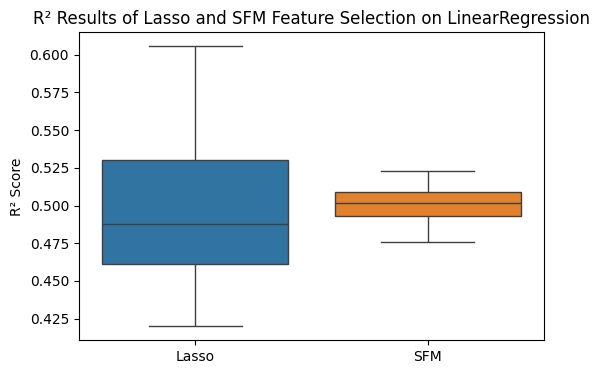

In [138]:
comparison_df = pd.DataFrame({
    'Lasso': line_lasso_r2_results,
    'SFM': line_SFM_r2_results
})

plt.figure(figsize=(6, 4))
sns.boxplot(data=comparison_df)
plt.title('R² Results of Lasso and SFM Feature Selection on LinearRegression')
plt.ylabel('R² Score')
plt.show()

##### Using **Lasso** for feature selection provided better data for LinearRegression model, rather than SelectFromModel.

### Time Series Model (Exponential Smoothing)

In [130]:
biomass = df['Biomass']

In [131]:
sample_size = int(0.8 * len(biomass))

train_set = biomass.iloc[0:sample_size]
test_set = biomass.iloc[sample_size:]
test_set_indecies = test_set.index

In [136]:
def expForcast(Ap, Fp, a):
    return Fp + a*(Ap-Fp)

alpha_vals = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
forecasts = {}  # dict to store forecasts for each alpha

for a in alpha_vals:
    # Train on the training set
    Fp = train_set[0]
    train_forecast = []
    
    # Train on the training set
    for val in train_set:
        new_forecast = expForcast(val, Fp, a)
        train_forecast.append(new_forecast)
        Fp = new_forecast 
    
    # Test on the test set
    test_forecast = []
    for val in test_set:
        new_forecast = expForcast(val, Fp, a)
        test_forecast.append(new_forecast)
        Fp = new_forecast
    
    # Store results
    forecasts[a] = {
        "train_forecast": train_forecast,
        "test_forecast": test_forecast,
        "train_set": train_set.tolist(),
        "test_set": test_set.tolist()
    }

for alpha, values in forecasts.items():
    train_mae = mean_absolute_error(values['train_set'], values['train_forecast'])
    test_mae = mean_absolute_error(values['test_set'], values['test_forecast'])
    train_r2 = r2_score(values['train_set'], values['train_forecast'])
    test_r2 = r2_score(values['test_set'], values['test_forecast'])
    print(f"Alpha: {alpha}, Train MAE: {train_mae}, Test MAE: {test_mae}, Train R2: {train_r2}, Test R2: {test_r2}\n")

Alpha: 0.1, Train MAE: 1942.5849540213103, Test MAE: 2533.492175666742, Train R2: 0.30363040126132834, Test R2: 0.19539626007120992

Alpha: 0.2, Train MAE: 1678.1249254415916, Test MAE: 2164.442711452453, Train R2: 0.46681811216651037, Test R2: 0.4017280025590104

Alpha: 0.4, Train MAE: 1095.18786726878, Test MAE: 1418.133441458875, Train R2: 0.7336542675449085, Test R2: 0.7023564022227315

Alpha: 0.6, Train MAE: 625.1941835113904, Test MAE: 825.3332017078627, Train R2: 0.8946855226162009, Test R2: 0.8792603540227772

Alpha: 0.8, Train MAE: 268.43486598658285, Test MAE: 355.01573510656584, Train R2: 0.9755617623916873, Test R2: 0.9713849585101728

Alpha: 0.9, Train MAE: 123.92879820163162, Test MAE: 163.08927647093057, Train R2: 0.9940023081115003, Test R2: 0.9929416286936463



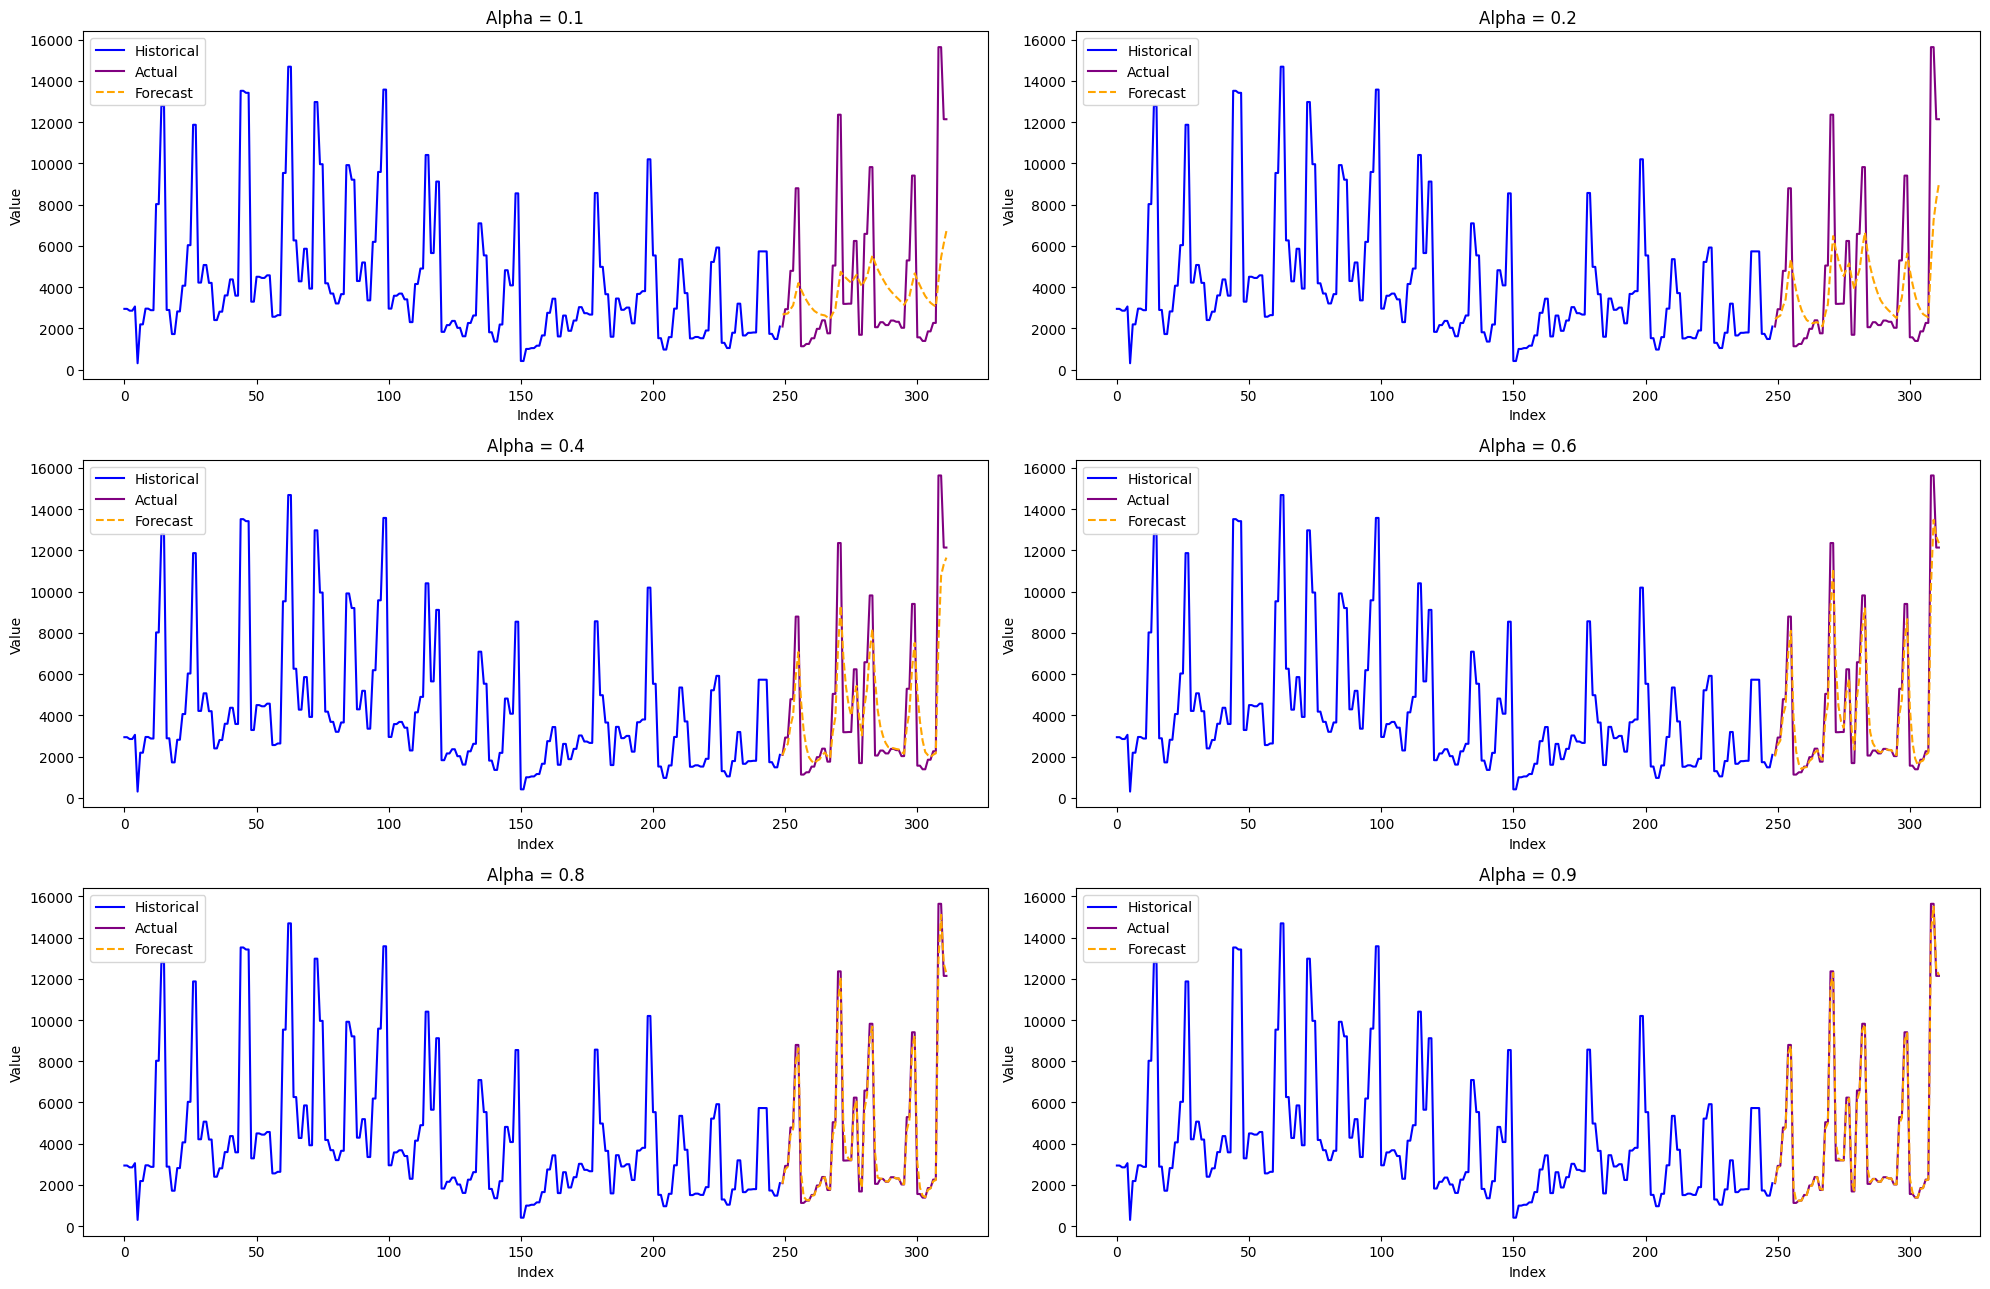

In [137]:
fig, ax = plt.subplots(3, 2, figsize=(20, 13))

for i, a in enumerate(alpha_vals):
    row, col = i // 2, i % 2
    ax[row, col].plot(train_set.index, train_set.values, label='Historical', color='blue')
    ax[row, col].plot(test_set.index, test_set, label='Actual', color='purple')
    ax[row, col].plot(test_set_indecies, forecasts[a]["test_forecast"], label='Forecast', color='orange', linestyle='--')
    ax[row, col].set_title(f'Alpha = {a}')
    ax[row, col].set_xlabel('Index')
    ax[row, col].set_ylabel('Value')
    ax[row, col].legend()

plt.tight_layout()
plt.show()

### Deep Learning (LSTM)

In [ ]:
!pip install tensorflow

In [39]:
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense

In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.51940299, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51940299, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51940299, 0.00645161, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.14029851, 0.99354839, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14029851, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14029851, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [42]:
time_steps = 1
n_features = X_scaled.shape[1]

# Reshape the input data to be 3D [samples, time steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], time_steps, n_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], time_steps, n_features))

# Build the LSTM model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [43]:
history = model_lstm.fit(X_train_reshaped, y_train, epochs=700, batch_size=32, validation_split=0.2)

Epoch 1/700
7/7 [==============================] - 1s 44ms/step - loss: 29440192.0000 - mae: 4312.4062 - val_loss: 30301004.0000 - val_mae: 4545.2002
Epoch 2/700
7/7 [==============================] - 0s 12ms/step - loss: 29438644.0000 - mae: 4312.2290 - val_loss: 30298714.0000 - val_mae: 4544.9434
Epoch 3/700
7/7 [==============================] - 0s 11ms/step - loss: 29435964.0000 - mae: 4311.8955 - val_loss: 30294010.0000 - val_mae: 4544.4136
Epoch 4/700
7/7 [==============================] - 0s 11ms/step - loss: 29430054.0000 - mae: 4311.1973 - val_loss: 30283996.0000 - val_mae: 4543.2871
Epoch 5/700
7/7 [==============================] - 0s 11ms/step - loss: 29417544.0000 - mae: 4309.7061 - val_loss: 30262938.0000 - val_mae: 4540.9180
Epoch 6/700
7/7 [==============================] - 0s 10ms/step - loss: 29392302.0000 - mae: 4306.6367 - val_loss: 30220652.0000 - val_mae: 4536.1504
Epoch 7/700
7/7 [==============================] - 0s 10ms/step - loss: 29341740.0000 - mae: 4300.58

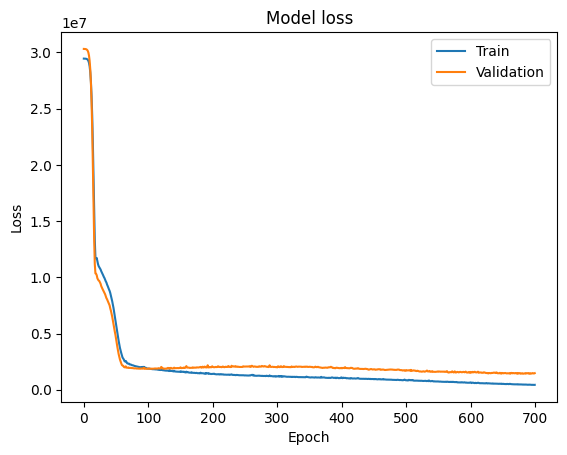

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

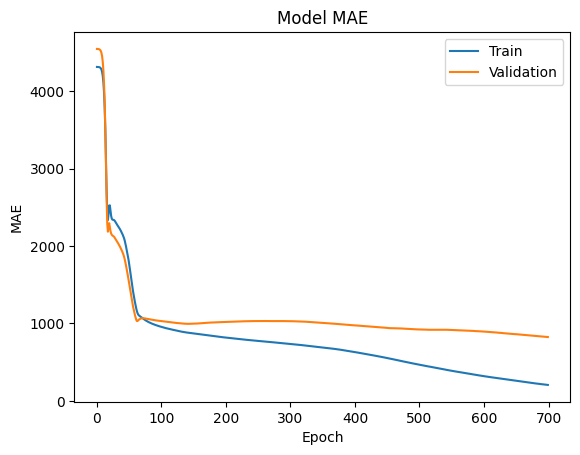

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [45]:
# Evaluate the model
loss, mae = model_lstm.evaluate(X_test_reshaped, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")

predictions = model_lstm.predict(X_test_reshaped)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)
print(f"R-squared Score on Test Data: {r2}")

2/2 [==============================] - 0s 3ms/step - loss: 1421395.7500 - mae: 901.6830
Mean Absolute Error on Test Data: 901.6830444335938
2/2 [==============================] - 0s 3ms/step
R-squared Score on Test Data: 0.8720303161276834


The LSTM model's performance is good

In [46]:
# Create a comparison DataFrame
predictions_flat = predictions.flatten()
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_flat
})
comparison_df

,Actual,Predicted
0,6262.666667,5557.847168
1,5917.333333,5576.263672
2,2897.666667,2875.993896
3,5532.000000,7154.525879
4,2300.000000,3671.068115
...,...,...
58,3653.666667,2008.308350
59,2023.000000,2622.709229
60,305.866667,2878.298096
61,4203.333333,4263.048340


In [ ]:
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 28)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,765 (456.12 KB)

 Trainable params: 38,921 (152.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,844 (304.08 KB)

In [ ]:
model_lstm.input_shape

(None, 1, 65)

### Training an LSTM Model with Feature Selection Using SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler to ensure all values are non-negative
scaler_chi2 = MinMaxScaler()
X_scaled_nonneg = scaler_chi2.fit_transform(X)

# Apply SelectKBest with f_classif (alternative to chi2 that works with any real numbers)
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled_nonneg, y)

# Get the selected feature names
selected_features_chi2 = X.columns[selector.get_support()]
print("Selected features:", selected_features_chi2)

# Split the selected features into train and test sets
X_train_chi2 = X_train[:, selector.get_support()]
X_test_chi2 = X_test[:, selector.get_support()]

# Reshape the input data to be 3D [samples, time steps, features]
X_train_chi2_reshaped = X_train_chi2.reshape((X_train_chi2.shape[0], time_steps, -1))
X_test_chi2_reshaped = X_test_chi2.reshape((X_test_chi2.shape[0], time_steps, -1))

Selected features: Index(['Sample_type_G1', 'Sample_type_G2', 'Sample_type_G3', 'Sample_type_G4',
       'Sample_type_Q1', 'Sample_type_Q2', 'Sample_type_Q3', 'Sample_type_Q4',
       'Sample_type_S1', 'Sample_type_S2'],
      dtype='object')


d:\Downloaded Programs\anaconda3\envs\pytorch-course\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
# Build the LSTM model
model_lstm_chi2 = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_chi2_reshaped.shape[1], X_train_chi2_reshaped.shape[2])),
    Dense(48, activation='relu'),
    Dense(32, activation='relu'),
    Dense(28, activation='relu'),
    Dense(1)
])

model_lstm_chi2.compile(optimizer='adam', loss='mse', metrics=['mae'])

d:\Downloaded Programs\anaconda3\envs\pytorch-course\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_chi2 = model_lstm_chi2.fit(X_train_chi2_reshaped, y_train, epochs=700, batch_size=32, validation_split=0.2)

Epoch 1/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 31548668.0000 - mae: 4439.7812 - val_loss: 30301784.0000 - val_mae: 4545.2861
Epoch 2/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31547996.0000 - mae: 4439.7031 - val_loss: 30300826.0000 - val_mae: 4545.1807
Epoch 3/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31546948.0000 - mae: 4439.5845 - val_loss: 30299318.0000 - val_mae: 4545.0142
Epoch 4/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31545306.0000 - mae: 4439.3970 - val_loss: 30296972.0000 - val_mae: 4544.7549
Epoch 5/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31542720.0000 - mae: 4439.1011 - val_loss: 30293232.0000 - val_mae: 4544.3418
Epoch 6/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31538602.0000 - mae: 4438.6309 - val_loss: 30287336.0000 - val_mae: 4543.6919
Epoch 7/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31532080.0000 - mae: 4437.8853 - val_loss: 30277934.0000 - val_mae: 4542.6572
Epoch 8/700
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

In [ ]:
# Evaluate the model
loss_chi2, mae_chi2 = model_lstm_chi2.evaluate(X_test_chi2_reshaped, y_test)
print(f"Mean Absolute Error on Test Data: {mae_chi2}")

predictions_chi2 = model_lstm_chi2.predict(X_test_chi2_reshaped)

# Calculate R-squared score
r2_chi2 = r2_score(y_test, predictions_chi2)
print(f"R-squared Score on Test Data: {r2_chi2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4093507.2500 - mae: 1557.6100
Mean Absolute Error on Test Data: 1521.8648681640625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
R-squared Score on Test Data: 0.63845292329425


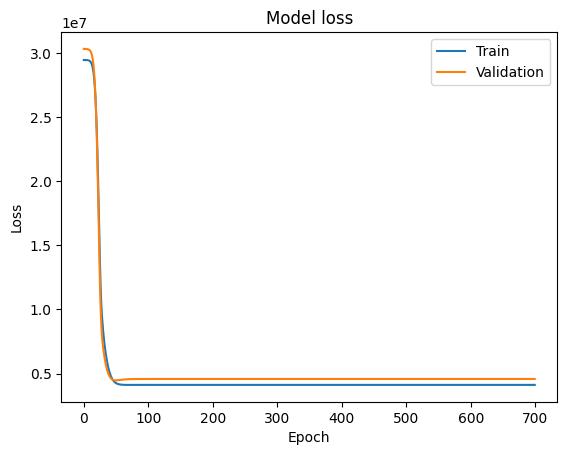

In [ ]:
plt.plot(history_chi2.history['loss'])
plt.plot(history_chi2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

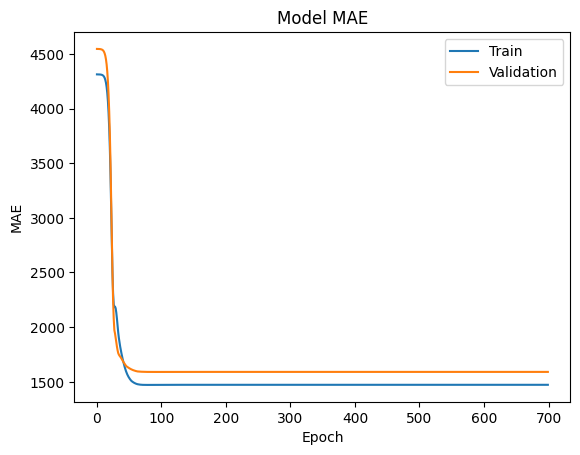

In [ ]:
plt.plot(history_chi2.history['mae'])
plt.plot(history_chi2.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model_lstm_chi2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 28)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,525 (291.12 KB)

 Trainable params: 24,841 (97.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,684 (194.08 KB)

In [ ]:
model_lstm_chi2.input_shape

(None, 1, 10)

# LSTM with multiple Random States

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define time steps and features
time_steps = 1
n_features = X_scaled.shape[1]

# Function to build the model
def build_model():
    # Build the LSTM model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dense(48, activation='relu'),
        Dense(32, activation='relu'),
        Dense(28, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [ ]:
# Initialize variables to track the best model
best_model = None
best_val_loss = float('inf')
best_history = None
best_random_state = None  # Variable to store the best random state

# Test 10 random states
for random_state in np.random.randint(0, 1000, 5):
    # Split the data with the current random state
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Reshape the input data to be 3D [samples, time steps, features]
    X_train_reshaped = X_train.reshape((X_train.shape[0], time_steps, n_features))
    X_test_reshaped = X_test.reshape((X_test.shape[0], time_steps, n_features))

    # Build and train the model
    model_lstm = build_model()
    history = model_lstm.fit(
        X_train_reshaped, y_train, 
        epochs=1000, batch_size=32, 
        validation_split=0.2, verbose=1
    )

    # Get the validation loss of the current model
    val_loss = min(history.history['val_loss'])

    # Update the best model if the current model performs better
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model_lstm
        best_history = history  # Save the history for the best model
        best_random_state = random_state  # Update the best random state

# Print the best random state
print("Best Random State:", best_random_state)

Epoch 1/1000
7/7 [==============================] - 1s 38ms/step - loss: 28760892.0000 - mae: 4315.0981 - val_loss: 31743142.0000 - val_mae: 4353.4863
Epoch 2/1000
7/7 [==============================] - 0s 14ms/step - loss: 28759120.0000 - mae: 4314.8877 - val_loss: 31740462.0000 - val_mae: 4353.1655
Epoch 3/1000
7/7 [==============================] - 0s 13ms/step - loss: 28755170.0000 - mae: 4314.4292 - val_loss: 31734296.0000 - val_mae: 4352.4248
Epoch 4/1000
7/7 [==============================] - 0s 12ms/step - loss: 28746638.0000 - mae: 4313.3770 - val_loss: 31720350.0000 - val_mae: 4350.7510
Epoch 5/1000
7/7 [==============================] - 0s 11ms/step - loss: 28727422.0000 - mae: 4311.0479 - val_loss: 31690408.0000 - val_mae: 4347.1543
Epoch 6/1000
7/7 [==============================] - 0s 13ms/step - loss: 28686946.0000 - mae: 4306.1094 - val_loss: 31628446.0000 - val_mae: 4339.7080
Epoch 7/1000
7/7 [==============================] - 0s 11ms/step - loss: 28601432.0000 - mae: 

In [35]:
from sklearn.metrics import r2_score

# Evaluate the model
best_loss, best_mae = best_model.evaluate(X_test_reshaped, y_test)
print(f"Mean Absolute Error on Test Data: {best_mae}")

predictions = best_model.predict(X_test_reshaped)

# Calculate R-squared score
best_r2 = r2_score(y_test, predictions)
print(f"R-squared Score on Test Data: {best_r2}")

2/2 [==============================] - 0s 4ms/step - loss: 1001587.2500 - mae: 491.2054
Mean Absolute Error on Test Data: 491.2054138183594
2/2 [==============================] - 0s 3ms/step
R-squared Score on Test Data: 0.9148368379374252


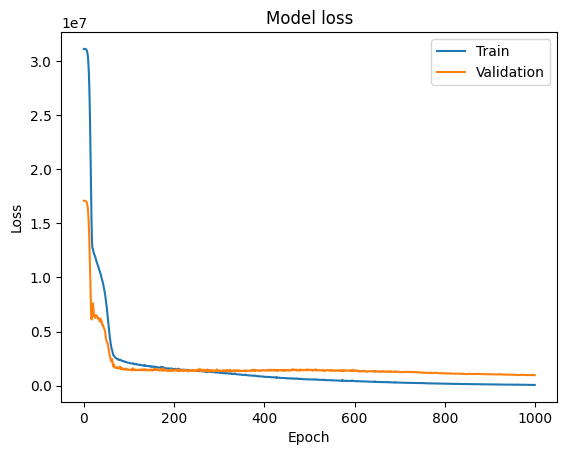

In [36]:
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

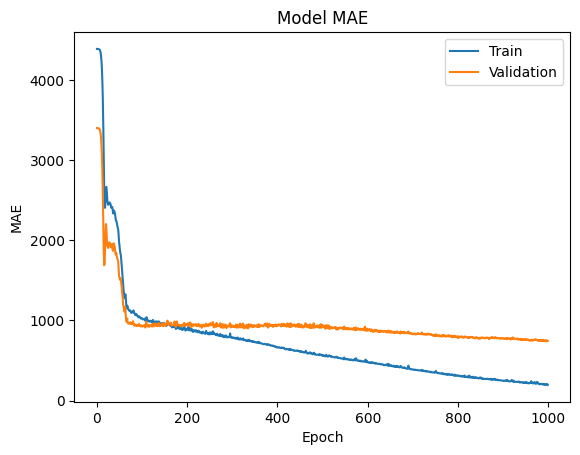

In [37]:
plt.plot(best_history.history['mae'])
plt.plot(best_history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [47]:
# Create a comparison DataFrame
predictions_flat = predictions.flatten()
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_flat
})
comparison_df

,Actual,Predicted
0,6262.666667,5557.847168
1,5917.333333,5576.263672
2,2897.666667,2875.993896
3,5532.000000,7154.525879
4,2300.000000,3671.068115
...,...,...
58,3653.666667,2008.308350
59,2023.000000,2622.709229
60,305.866667,2878.298096
61,4203.333333,4263.048340


#### LSTM Conclusion:
using feature selection with LSTM model made it worse than the lstm model that used all the features